In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [57]:
df = pd.read_csv("/Users/misiaduda/Downloads/Animation_Movies.csv")

## **(1) Opis zbioru danych**

In [58]:
print("Rozmiar zbioru danych:", df.shape)
print("\nLiczba braków danych:\n", df.isnull().sum())
print("\nTypy zmiennych:\n", df.dtypes)

Rozmiar zbioru danych: (51945, 23)

Liczba braków danych:
 id                          0
title                       1
vote_average                0
vote_count                  0
status                      0
release_date             2137
revenue                     0
runtime                     0
adult                       0
backdrop_path           36110
budget                      0
homepage                43692
imdb_id                 22393
original_language           0
original_title              1
overview                 6079
popularity                  0
poster_path             14011
tagline                 47267
genres                      0
production_companies    22547
production_countries    12245
spoken_languages        18127
dtype: int64

Typy zmiennych:
 id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   in

## *(2) Statystyki opisowe zmiennych numerycznych*

In [59]:
num_cols = df.select_dtypes(include=[np.number]).columns
print("\nStatystyki opisowe:\n", df[num_cols].describe())


Statystyki opisowe:
                  id  vote_average    vote_count       revenue       runtime  \
count  5.194500e+04  51945.000000  51945.000000  5.194500e+04  51945.000000   
mean   6.188122e+05      2.597083     40.395380  1.863464e+06     20.901415   
std    3.479748e+05      3.318748    482.705948  3.049824e+07     39.016002   
min    1.200000e+01      0.000000      0.000000  0.000000e+00      0.000000   
25%    3.300810e+05      0.000000      0.000000  0.000000e+00      3.000000   
50%    6.119150e+05      0.000000      0.000000  0.000000e+00      7.000000   
75%    9.159040e+05      6.000000      2.000000  0.000000e+00     19.000000   
max    1.238314e+06     10.000000  19463.000000  1.450027e+09   3720.000000   

             budget    popularity  
count  5.194500e+04  51945.000000  
mean   5.759513e+05      1.886233  
std    7.606628e+06      9.700913  
min    0.000000e+00      0.000000  
25%    0.000000e+00      0.600000  
50%    0.000000e+00      0.600000  
75%    0.00000

### WNIOSKI:
Średnio filmy dostają ocenę trochę poniżej 3, mniej niż 25% filmów otrzymuje ocenę conjamniej 6 - średnio ocena ta pochodzi z 40 oddanych recenzji.  W kategorii budget mamy bardzo dużo wyników zerowych - to może wskazywać na błąd.  

## **(3) Analiza grupowa względem zmiennej jakościowej 'status'**

In [60]:
grouped = df.groupby("status")[["vote_count", "runtime", "popularity"]].mean().sort_values("vote_count", ascending=False)
print("\nŚrednie statystyki wg statusu filmu:\n", grouped)


Średnie statystyki wg statusu filmu:
                  vote_count    runtime  popularity
status                                            
Released          41.035984  20.752982    1.892165
Rumored            0.090909   1.000000    0.660273
In Production      0.007874  25.963255    1.635026
Canceled           0.000000  16.411765    0.722176
Planned            0.000000  39.580328    0.825039
Post Production    0.000000  23.577320    3.426031


### WNIOSKI: 
Największą popularność mają filmy w postprodukcji. Możemy też zauważyć że poza największą średnią liczbą głosów w kategorii Released co jest oczywiste, natomiast pojawiają się też głosy oddane na filmy które dopiero mają powstać. według pogłosek.

## **(4) Analiza zmiennej multilabel 'genres'**

Liczba filmów zakwalifikowanych do danego gatunku
Animation          51954
Comedy              7879
Family              7480
Fantasy             3896
Adventure           3539
Drama               2849
Science Fiction     2540
Action              2428
Documentary         1897
Music               1697
Horror              1393
Romance              866
TV Movie             679
Mystery              543
History              499
War                  368
Crime                320
Thriller             306
Western              161
Name: count, dtype: int64


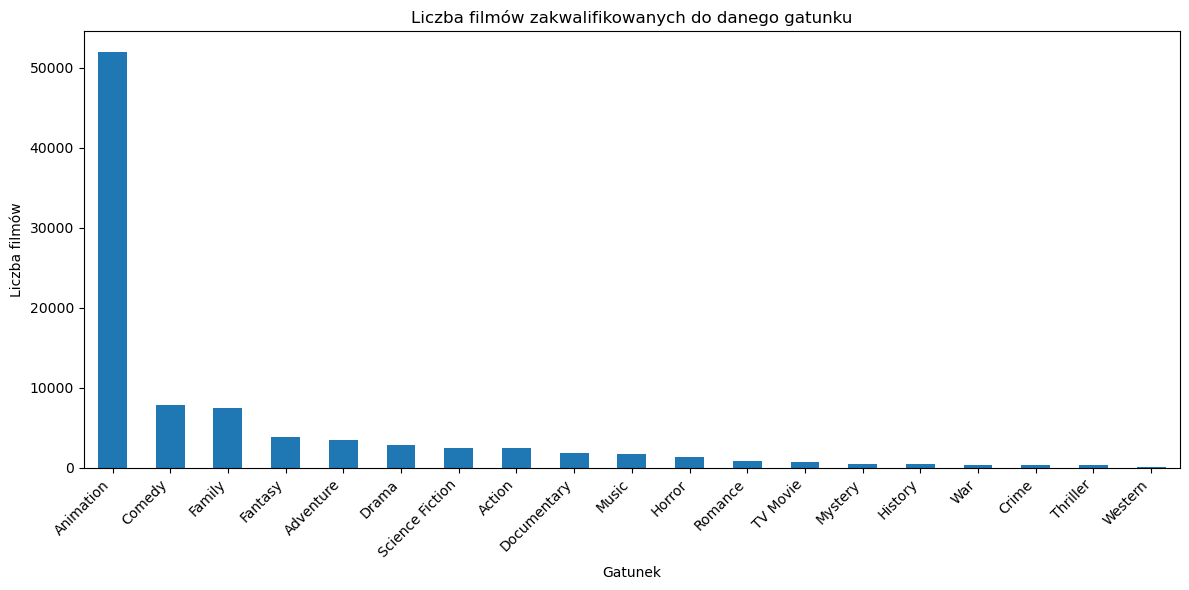

In [56]:
df["genres"] = df["genres"].fillna("")
df["genres_list"] = df["genres"].apply(lambda x: [g.strip() for g in x.split(",") if g.strip()])
all_genres = sum(df["genres_list"], [])
genre_counts = pd.Series(all_genres).value_counts()
print("Liczba filmów zakwalifikowanych do danego gatunku")
print(genre_counts)

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title("Liczba filmów zakwalifikowanych do danego gatunku")
plt.xlabel("Gatunek")
plt.ylabel("Liczba filmów")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### WNIOSKI: 
Najczęstszy rodzaj produkowanych filmów to przede wszystkim Animation, potem komedia i filmy rodzinne. Najrzadszymi pozostają Westerny, thrillery i filmy kryminalne.

## **(5) Wykresy zależności między zmiennymi**

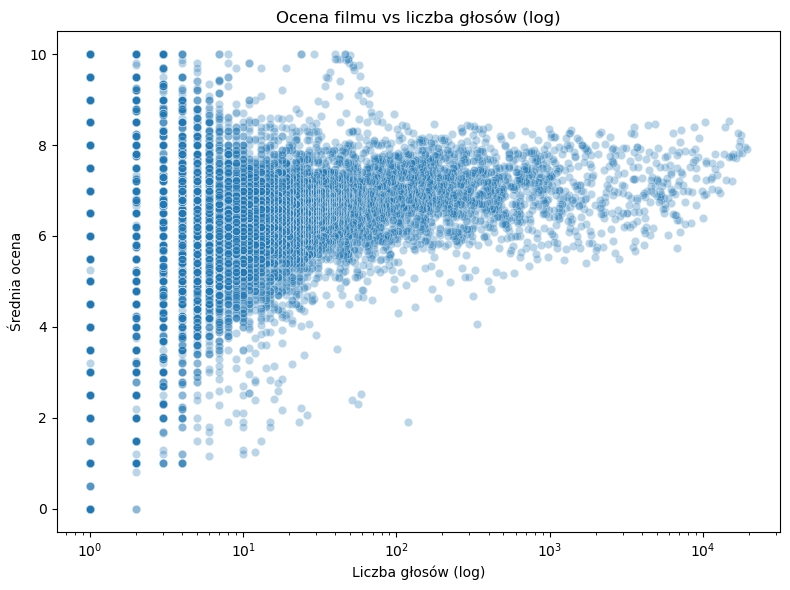

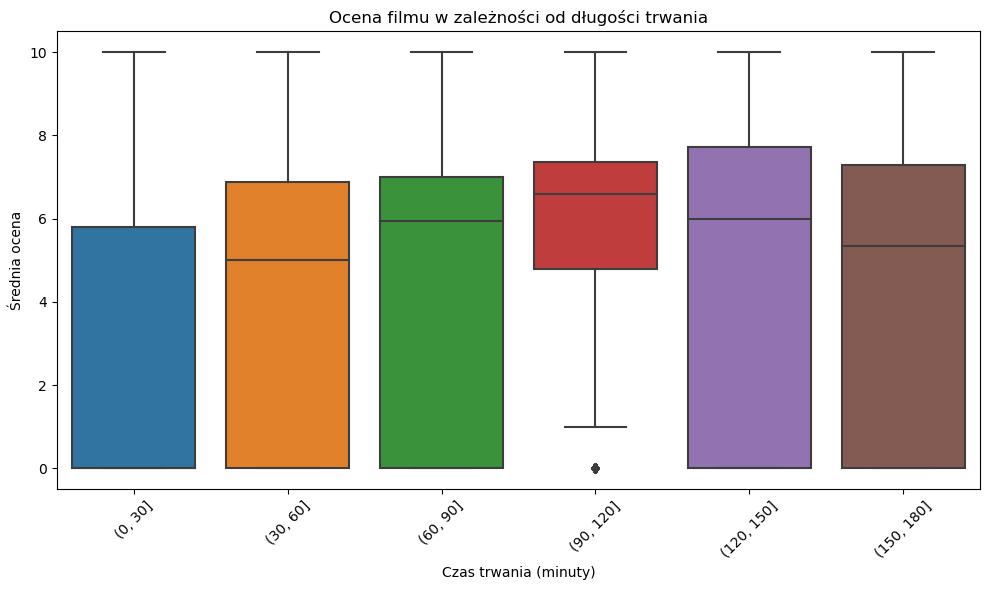

In [47]:
# Wykres 1: Rating vs Votes
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="vote_count", y="vote_average", alpha=0.3)
plt.xscale("log")
plt.title("Ocena filmu vs liczba głosów (log)")
plt.xlabel("Liczba głosów (log)")
plt.ylabel("Średnia ocena")
plt.tight_layout()
plt.show()

# Wykres 2: Runtime vs Rating
bins = [0, 30, 60, 90, 120, 150, 180]
runtime_bins = pd.cut(df["runtime"], bins=bins)
plt.figure(figsize=(10,6))
sns.boxplot(x=runtime_bins, y="vote_average", data=df)
plt.title("Ocena filmu w zależności od długości trwania")
plt.xlabel("Czas trwania (minuty)")
plt.ylabel("Średnia ocena")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### WNIOSKI: 
Filmy z większą liczbą głosów mają zwykle bardziej uśrednione oceny, natomiast mniej popularne filmy często osiągają skrajne wartości ocen -ich zakres jest dużo większy. Najwyższe oceny mają filmy o standardowym czasie trwania (60–120 min), natomiast bardzo krótkie i bardzo długie filmy są oceniane niżej.